This Mandatory assignment was done by: Daniel Trofimovs (s374922) and Sander Schultz (s374968)

Task 1. Read the CSV file in Pandas and create a DataFrame named Grc_df. What is the number of rows and columns in Grc_df? Print the first 10 and last 10 rows of Grc_df.

In [2]:
import pandas as pd
import matplotlib.pyplot as pyplot
import seaborn as sea

# Display is used to show several outputs per cell
from IPython.display import display

# Create dataframe from csv file
Grc_df = pd.read_csv('data/Grocery_dataset.csv')

# Getting the number of rows and columns
num_rows, num_cols = Grc_df.shape

print(f"Number of rows: {num_rows}\n")
print(f"Number of columns: {num_cols}\n")

print("First 10 and last 10 rows: \n")
display(Grc_df.head(10), Grc_df.tail(10))

FileNotFoundError: [Errno 2] No such file or directory: 'Grocery_dataset.csv'

Task 2. Are there any null values in the Grc_df? If yes, then in which columns and how many? Finally, handle these null values using any strategy shown during the labs

In [2]:
# Checking for null values
null_values = Grc_df.isnull().sum()

# Printing the columns with null values
print("Null values in each column: ")
print(null_values[null_values > 0])

# Since the null values are numerical, I have chosen to fill the null values with the mean
Grc_df['Item_Weight'].fillna(Grc_df['Item_Weight'].mean(), inplace=True)

# After getting a typeerror and running print(Grc_df['Outlet_Size'].unique()), we saw that Outlet_Size contains: ['Medium' nan 'High' 'Small']
# We made the decision to switch the nan values to contant value "Unknown"
Grc_df['Outlet_Size'].fillna('Unknown', inplace=True)

#Verifying if the null values are handled
null_values_after_filling = Grc_df.isna().sum()
print("\nNull values after filling: ")
print(null_values_after_filling[null_values_after_filling > 0])

Null values in each column: 
Item_Weight     818
Outlet_Size    1439
dtype: int64

Null values after filling: 
Series([], dtype: int64)


Task 3. How many unique Outlet Sizes are there in the Grc_df? Which outlet size is maximum, and which is minimum?

In [3]:
#Unique Outlet Sizes
unique_outlet_sizes = Grc_df['Outlet_Size'].nunique()
print(f"Number of unique Outlet Sizes: {unique_outlet_sizes}\n")

#Frequency of Outlet Sizes
outlet_size_counts = Grc_df['Outlet_Size'].value_counts()
print(f"Frequncy of each Outlet Size: {outlet_size_counts}\n")

#Most and least frequent Outlet Size
most_frequent_size = outlet_size_counts.idxmax()
least_frequent_size = outlet_size_counts.idxmin()

print(f"\nMost frequent Outlet Size: {most_frequent_size} ({outlet_size_counts.max()} occurrences)\n")
print(f"\nLeast frequent Outlet Size: {least_frequent_size} ({outlet_size_counts.min()} occurrences)\n")

Number of unique Outlet Sizes: 4

Frequncy of each Outlet Size: Outlet_Size
Medium     1605
Unknown    1439
Small      1398
High        558
Name: count, dtype: int64


Most frequent Outlet Size: Medium (1605 occurrences)


Least frequent Outlet Size: High (558 occurrences)



Task4. How many unique Item Fat Content types are in the Grc_df? List them. Do you see any issues with the Item Fat Content types? If yes, then handle this issue

In [4]:
unique_fat_content = Grc_df['Item_Fat_Content'].unique()
print(f"Unique Item Fat Content types before cleaning: {unique_fat_content}\n")

# Adjust for abbreviations or wrong formatting
Grc_df['Item_Fat_Content'] = Grc_df['Item_Fat_Content'].replace({
    'reg': 'Regular',
    'low fat': 'Low Fat',
    'LF': 'Low Fat'
})

unique_fat_content = Grc_df['Item_Fat_Content'].unique()

print(f"The Fat Content types after cleaning are {unique_fat_content}\n")

Unique Item Fat Content types before cleaning: ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']

The Fat Content types after cleaning are ['Low Fat' 'Regular']



Task 5. Drop the columns having index values of 0, 6 and create a new DataFrame Grc_new_df

In [5]:
Grc_new_df = Grc_df.drop(Grc_df.columns[[0, 6]], axis=1)

Grc_new_df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Unknown,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
4995,5.82,Regular,0.077476,Fruits and Vegetables,255.3330,2002,Unknown,Tier 2,Supermarket Type1,4870.3270
4996,8.52,Low Fat,0.027059,Soft Drinks,153.3682,1997,Small,Tier 1,Supermarket Type1,914.8092
4997,15.50,Regular,0.126200,Fruits and Vegetables,178.4028,2009,Medium,Tier 3,Supermarket Type2,1239.7196
4998,16.70,Regular,0.119462,Fruits and Vegetables,182.7976,1997,Small,Tier 1,Supermarket Type1,1810.9760


Task 6. Using different Supermarket type listed in the column Outlet_Type create two different DataFrames from Grc_new_df. Name these DataFrames as SupType_1 and SupType_2

In [6]:
unique_outlet_types = Grc_new_df['Outlet_Type'].unique()
print(f"Unique Outlet Types: {unique_outlet_types}\n\n")

# Creating the Dataframe for 'Supermarket Type1'
SupType_1 = Grc_new_df[Grc_new_df['Outlet_Type'] == 'Supermarket Type1']

# Creating the Dataframe for 'Grocery Store'
SupType_2 = Grc_new_df[Grc_new_df['Outlet_Type'] == 'Grocery Store']

# Print the new Dataframes
print("Dataframe SupType1 (Supermarket Type1) and SupType2 (Grocery Store): \n")

# Displaying both DataFrames in same cell
display(SupType_1, SupType_2)

Unique Outlet Types: ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


Dataframe SupType1 (Supermarket Type1) and SupType2 (Grocery Store): 



,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052
6,13.65,Regular,0.012741,Snack Foods,57.6588,1987,High,Tier 3,Supermarket Type1,343.5528
8,16.20,Regular,0.016687,Frozen Foods,96.9726,2002,Unknown,Tier 2,Supermarket Type1,1076.5986
...,...,...,...,...,...,...,...,...,...,...
4993,5.98,Low Fat,0.075675,Hard Drinks,53.3614,1999,Medium,Tier 1,Supermarket Type1,331.5684
4994,18.75,Low Fat,0.010382,Household,207.8954,1999,Medium,Tier 1,Supermarket Type1,2292.3494
4995,5.82,Regular,0.077476,Fruits and Vegetables,255.3330,2002,Unknown,Tier 2,Supermarket Type1,4870.3270
4996,8.52,Low Fat,0.027059,Soft Drinks,153.3682,1997,Small,Tier 1,Supermarket Type1,914.8092


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,19.200000,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Unknown,Tier 3,Grocery Store,732.3800
23,12.959605,Low Fat,0.057557,Baking Goods,107.6938,1985,Small,Tier 1,Grocery Store,214.3876
28,5.925000,Regular,0.161467,Dairy,45.5086,1998,Unknown,Tier 3,Grocery Store,178.4344
29,12.959605,Regular,0.072222,Canned,43.6454,1985,Small,Tier 1,Grocery Store,125.8362
30,19.250000,Low Fat,0.170349,Dairy,55.7956,1998,Unknown,Tier 3,Grocery Store,163.7868
...,...,...,...,...,...,...,...,...,...,...
4943,12.959605,Low Fat,0.126761,Breakfast,176.9370,1985,Small,Tier 1,Grocery Store,352.8740
4955,16.200000,Low Fat,0.074019,Frozen Foods,41.7454,1998,Unknown,Tier 3,Grocery Store,83.8908
4957,12.959605,Low Fat,0.124300,Household,73.4696,1985,Small,Tier 1,Grocery Store,298.2784
4968,12.959605,Low Fat,0.122832,Dairy,217.6850,1985,Small,Tier 1,Grocery Store,432.7700


Task 7. Using Seaborn (“ggplot style”) create a (2,1) subplot of a box plot showing 5-point summary of the column Item_MRP for SupType_1 and SupType_2. Which Outlet Type has a higher median MRP? Are there any outliers?

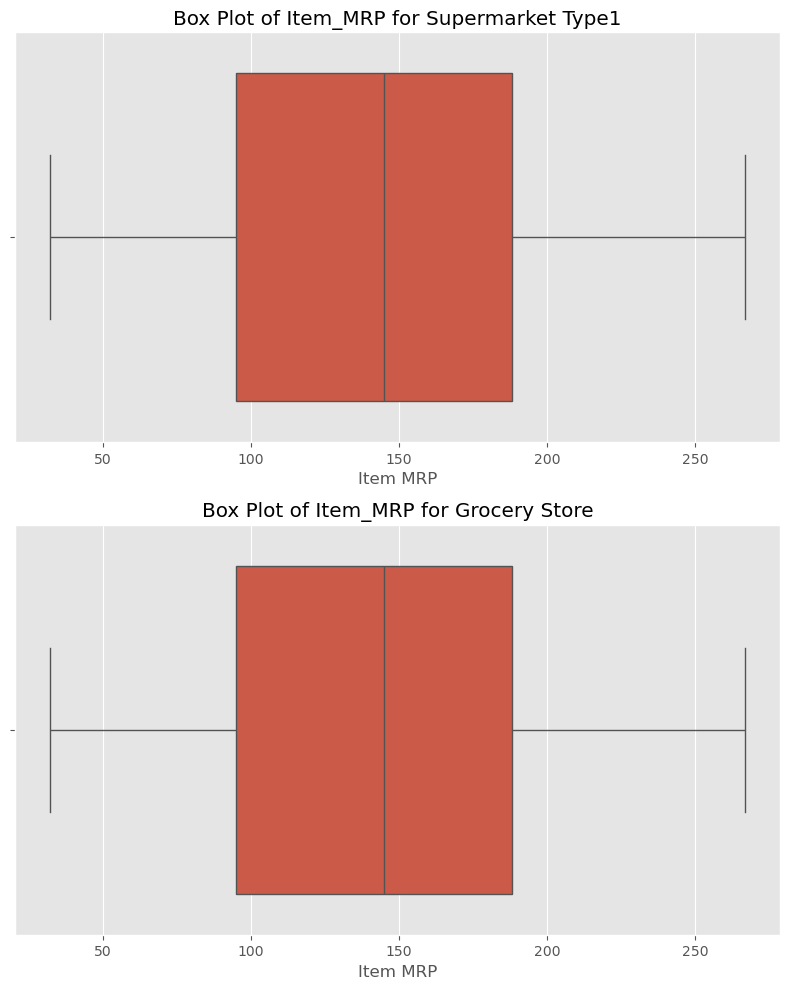

Median MRP for Supermarket Type1: 144.7457

Median MRP for Grocery Store: 140.5154

SuperMarket Type1 has a higher median MRP



In [7]:
#Setting the seaborn as "ggplot"
pyplot.style.use('ggplot')

#Creating a (2, 1) subplot
fig, axes = pyplot.subplots(nrows=2, ncols=1, figsize=(8, 10))

#Box plot for SupType1 (Supermarket Type1)
sea.boxplot(ax=axes[0], x=SupType_1['Item_MRP'])
axes[0].set_title('Box Plot of Item_MRP for Supermarket Type1')
axes[0].set_xlabel('Item MRP')

#Box plot for SupType2
sea.boxplot(ax=axes[1], x=SupType_1['Item_MRP'])
axes[1].set_title('Box Plot of Item_MRP for Grocery Store')
axes[1].set_xlabel('Item MRP')

#Show the plots
pyplot.tight_layout()
pyplot.show()

#Calculating and comparing the median MRP
median_mrp_supType1 = SupType_1['Item_MRP'].median()
median_mrp_supType2 = SupType_2['Item_MRP'].median()

print(f"Median MRP for Supermarket Type1: {median_mrp_supType1}\n")
print(f"Median MRP for Grocery Store: {median_mrp_supType2}\n")

#Checking for highest median MRP
if median_mrp_supType1 > median_mrp_supType2:
    print("SuperMarket Type1 has a higher median MRP\n")
else:
    print("Grocery Store has a higher median MRP\n")

Task 8. Concatenate the DataFrames SupType_1 and SupType_2 to create a new DataFrame Grc_Concat_df and sort it in ascending order based on the column Item_Outlet_Sales. What is the Outlet_Location_type of the store with the lowest sales?

In [8]:
# Concatenate the two DataFrames
Grc_Concat_df = pd.concat([SupType_1, SupType_2])

# Sort the concatenated DataFrame based on Item Outlet Sales in ascending order
Grc_Concat_df_sorted = Grc_Concat_df.sort_values(by='Item_Outlet_Sales', ascending=True)

# Find the Outlet Location Type of the store with the lowest sales
lowest_sales_location = Grc_Concat_df_sorted.iloc[0]['Outlet_Location_Type']

print(f"Outlet Location Type with lowest sales is: {lowest_sales_location}\n")

Outlet Location Type with lowest sales is: Tier 3



Task 9. Using columns Outlet_Size and Outlet_Location_Type to create a multiple index for Grc_Concat_df.

In [9]:
# Create a multiple index using Outlet Size and Outlet Location Type
Grc_Concat_df.set_index(['Outlet_Size', 'Outlet_Location_Type'], inplace=True)

Grc_Concat_df

Item_Weight Item_Fat_Content  \
Outlet_Size Outlet_Location_Type                                 
Medium      Tier 1                   9.300000          Low Fat   
            Tier 1                  17.500000          Low Fat   
High        Tier 3                   8.930000          Low Fat   
            Tier 3                  13.650000          Regular   
Unknown     Tier 2                  16.200000          Regular   
...                                       ...              ...   
Small       Tier 1                  12.959605          Low Fat   
Unknown     Tier 3                  16.200000          Low Fat   
Small       Tier 1                  12.959605          Low Fat   
            Tier 1                  12.959605          Low Fat   
Unknown     Tier 3                  11.650000          Low Fat   

                                  Item_Visibility     Item_Type  Item_MRP  \
Outlet_Size Outlet_Location_Type                                            
Medium      Tier 1                       0.016047         Dairy  249.8092   
            Tier 1                       0.016760          Meat  141.6180   
High        Tier 3                       0.000000     Household   53.8614   
            Tier 3                       0.012741   Snack Foods   57.6588   
Unknown     Tier 2                       0.016687  Frozen Foods   96.9726   
...                                           ...           ...       ...   
Small       Tier 1                       0.126761     Breakfast  176.9370   
Unknown     Tier 3                       0.074019  Frozen Foods   41.7454   
Small       Tier 1                       0.124300     Household   73.4696   
            Tier 1                       0.122832         Dairy  217.6850   
Unknown     Tier 3                       0.220111  Baking Goods  153.0024   

                                  Outlet_Establishment_Year  \
Outlet_Size Outlet_Location_Type                              
Medium      Tier 1                                     1999   
            Tier 1                                     1999   
High        Tier 3                                     1987   
            Tier 3                                     1987   
Unknown     Tier 2                                     2002   
...                                                     ...   
Small       Tier 1                                     1985   
Unknown     Tier 3                                     1998   
Small       Tier 1                                     1985   
            Tier 1                                     1985   
Unknown     Tier 3                                     1998   

                                        Outlet_Type  Item_Outlet_Sales  
Outlet_Size Outlet_Location_Type                                        
Medium      Tier 1                Supermarket Type1          3735.1380  
            Tier 1                Supermarket Type1          2097.2700  
High        Tier 3                Supermarket Type1           994.7052  
            Tier 3                Supermarket Type1           343.5528  
Unknown     Tier 2                Supermarket Type1          1076.5986  
...                                             ...                ...  
Small       Tier 1                    Grocery Store           352.8740  
Unknown     Tier 3                    Grocery Store            83.8908  
Small       Tier 1                    Grocery Store           298.2784  
            Tier 1                    Grocery Store           432.7700  
Unknown     Tier 3                    Grocery Store           455.4072  

[3936 rows x 8 columns]

Task 10. Cut the column Item_Weight of Grc_Concat_df into 10 buckets and compute each bucket's mean, minimum, maximum, and count

In [10]:
# Cut the Item Weight column into 10 buckets
Grc_Concat_df['Weight_Bucket'] = pd.cut(Grc_Concat_df['Item_Weight'], bins=10)

# Group by the Weight Bucket and compute mean, min, max, and count for each bucket
bucket_stats = Grc_Concat_df.groupby('Weight_Bucket')['Item_Weight'].agg(['mean', 'min', 'max', 'count'])

bucket_stats

,mean,min,max,count
Weight_Bucket,,,,
"(4.538, 6.234]",5.607971,4.555000,6.215,239
"(6.234, 7.914]",7.118234,6.235000,7.905,453
"(7.914, 9.594]",8.780556,7.930000,9.500,423
"(9.594, 11.273]",10.359438,9.600000,11.150,347
"(11.273, 12.952]",12.074875,11.300000,12.850,400
"(12.952, 14.632]",13.370576,12.959605,14.600,607
"(14.632, 16.312]",15.503435,14.650000,16.250,393
"(16.312, 17.991]",17.167507,16.350000,17.850,377
"(17.991, 19.671]",18.842420,18.000000,19.600,376
